<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/SSB_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This experiment covers Single Sideband modulation and demodulation in the time and frequency domains. It also includes the effect of frequency and phase non-coherence.

Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# SSB-SC modulation in the time and frequency domains - Frequency Discrimination Method

In this section we will modulate a SSB-SC signal using the frequency discrimination method (filtering method).

First, we generate a DBS-SC signal using the product modulator, then we keep one of the two sidebands (either the USB or LSB) using a BPF.

To c reate the function that produce the message signal $x(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$, run the following code cell

In [15]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # message #1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # message #2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # message #3
   mt=m1t+m2t+m3t # message signal
   return mt

Then we create a function that produce c(t)

In [16]:
def func_ct(Ac,fc,t,phi):
   ct=Ac*np.cos(2*math.pi*fc*t+phi*math.pi/180) # carrier
   return ct

Now, we create a function that produce the DSB-SC modulated signal

In [17]:
def DSBSC_mod(mt,ct):
   st=mt*ct # DSB-SC modulation
   return st

Let us define a BPF with cutt-off frequencies $f_{low}$ and $f_{high}$

In [18]:
from scipy import signal
def butter_bandpass(st,lowcut, highcut, fs, order):
    low = lowcut / (fs/2)
    high = highcut / (fs/2)
    b, a = signal.butter(order, [low, high], btype='bandpass')
    output = signal.filtfilt(b, a, st)
    return output

Now we will produce the SSB-SC signal

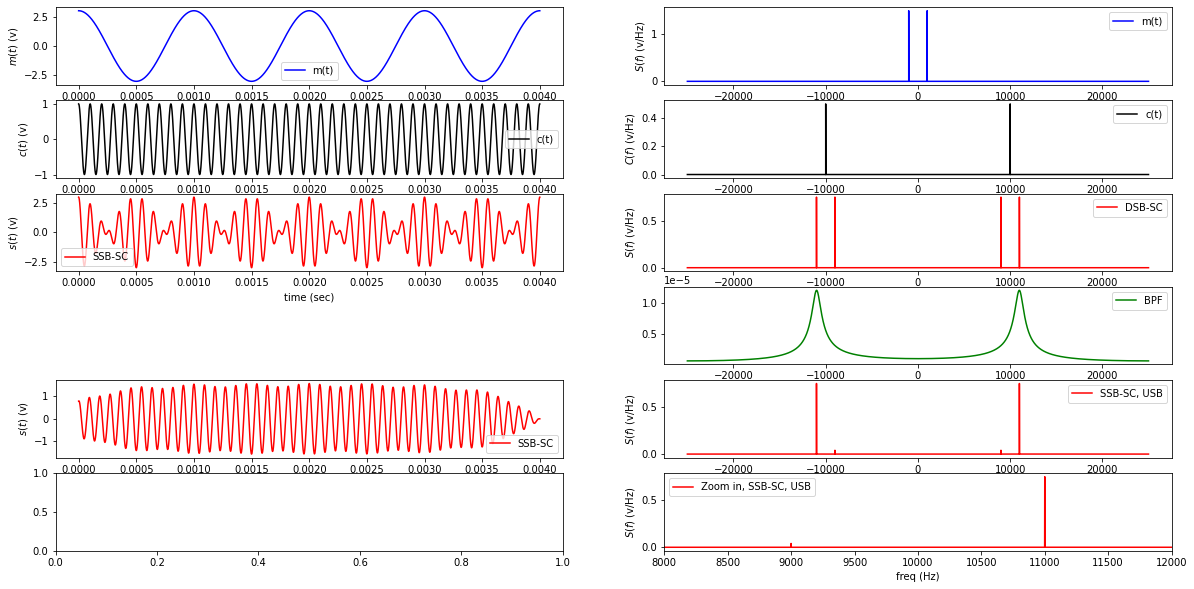

In [19]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=0 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=0 # amplitude of message signal
fm3=3000 # fequency of carrier signal


Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

Phi=0 #carrier noncoherence in phase
fd=0 #carrier noncoherence in frequency

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# BPF parameters 
forder=1 # order of the filter
fs=1/Tstep
lowcut_usb = fc+(fm/2)
highcut_usb = fc+(3*fm/2)
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder)

#butter_bandpass(st,lowcut, highcut,fs,forder)
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(621)
ax2 = f.add_subplot(622)
ax3 = f.add_subplot(623)
ax4 = f.add_subplot(624)
ax5 = f.add_subplot(625)
ax6 = f.add_subplot(626)
ax8 = f.add_subplot(628)
ax9 = f.add_subplot(629)
ax10 = f.add_subplot(6,2,10)
ax11 = f.add_subplot(6,2,11)
ax12 = f.add_subplot(6,2,12)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='SSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax9.plot(t,SSB_mod_usb,'r',label='SSB-SC')
ax9.set_xlabel('time (sec)')
ax9.set_ylabel('$s(t)$ (v)')
ax9.legend()
## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

## BPF parameters 
fs=1/Tstep
lowcut_usb = fc+(fm/2)
highcut_usb = fc+(3*fm/2)
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder)

##Transfer function of the filter
L=len(t)
impls=np.zeros(L)
impls[0]=1

## apply the filter
Filter_output_USB = butter_bandpass(impls,lowcut_usb,highcut_usb ,fs,forder)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

DSBf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
DSBf=DSBf[idx]/N
ax6.plot(freqs, DSBf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

## plot the frequency response of the filter
N=len(t)           
FILTER_OUTPUT_USB = np.abs(np.fft.fft(Filter_output_USB))  # fft of the impulse signal
freqs = np.fft.fftfreq(impls.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
FILTER_OUTPUT_USB=FILTER_OUTPUT_USB[idx]/N
ax8.plot(freqs, FILTER_OUTPUT_USB,'g',label='BPF')
ax8.set_xlabel('frequency (Hz)')
ax8.legend()

SSBf_USB = np.abs(np.fft.fft(SSB_mod_usb))
freqs = np.fft.fftfreq(SSB_mod_usb.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SSBf_USB=SSBf_USB[idx]/N
ax10.plot(freqs, SSBf_USB,'r',label='SSB-SC, USB')
ax10.set_xlabel('freq (Hz)')
ax10.set_ylabel('$S(f)$ (v/Hz)')
ax10.legend()

SSBf_USB = np.abs(np.fft.fft(SSB_mod_usb))
freqs = np.fft.fftfreq(SSB_mod_usb.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SSBf_USB=SSBf_USB[idx]/N
ax12.plot(freqs, SSBf_USB,'r',label='Zoom in, SSB-SC, USB')
ax12.set_xlabel('freq (Hz)')
ax12.set_ylabel('$S(f)$ (v/Hz)')
ax12.set_xlim(fc-2*fm,fc+2*fm)
ax12.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\

# SSB-SC demodultion in the time and frequency domains - Frequency Discrimination Method

Let us define a Butterworth Low Pass filter with Bandwidth equal to $f_{3dB}$.

In [20]:
#f3db : cut-off frequency
#forder: order of the filter
from scipy import signal
def func_filter(rt,f3db,Tstep,forder):
   fs=1/Tstep
   w = fc / (fs / 2) # Normalize the frequency
   b, a = signal.butter(forder, w, 'low')
   output = signal.filtfilt(b, a, rt)
   return output

Now, let us do the SSB demodultion of $m(t)$

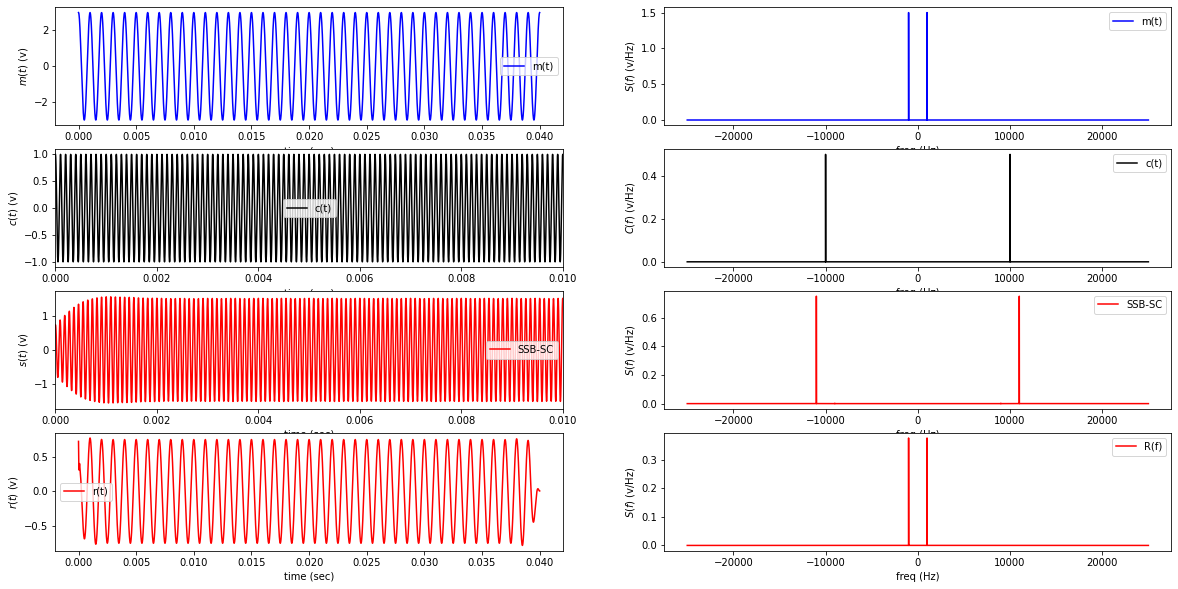

In [26]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=0 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=0 # amplitude of message signal
fm3=3000 # fequency of carrier signal


Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

Phi=0 #carrier noncoherence in phase
fd=0 #carrier noncoherence in frequency

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=40/fm
Tstep=0.001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# BPF parameters 
forder_BPF=2 # order of the filter
fs=1/Tstep
lowcut_usb = fc+(fm/2)
highcut_usb = fc+(3*fm/2)
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder_BPF)

rt=SSB_mod_usb*ct

## LPF parameters 
forder_LPF=5
f3db=2*fm
mrt=func_filter(rt,f3db,Tstep,forder_LPF)

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.set_xlim(0,Tstop/4)
ax3.legend()

ax5.plot(t,SSB_mod_usb,'r',label='SSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.set_xlim(0,Tstop/4)
ax5.legend()

ax7.plot(t,mrt,'r',label='r(t)')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$r(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# BPF parameters 
fs=1/Tstep
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder_BPF)

ct=func_ct(Ac,fc+fd,t,Phi) # carrier
rt=SSB_mod_usb*ct

## LPF parameters 
f3db=2*fm
mrt=func_filter(rt,f3db,Tstep,forder_LPF)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

SSBf_USB = np.abs(np.fft.fft(SSB_mod_usb))
freqs = np.fft.fftfreq(SSB_mod_usb.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SSBf_USB=SSBf_USB[idx]/N
ax6.plot(freqs, SSBf_USB,'r',label='SSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

MRT = np.abs(np.fft.fft(mrt))
freqs = np.fft.fftfreq(mrt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MRT=MRT[idx]/N
ax8.plot(freqs, MRT,'r',label='R(f)')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$S(f)$ (v/Hz)')
ax8.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\

# SSB modulation/demodulation: effect of carrier noncoherence in phase  on demodulated signal

Let us simulate SSB demdoulation with carrier noncoherence in phase, let us assume phase difference of 80 degree

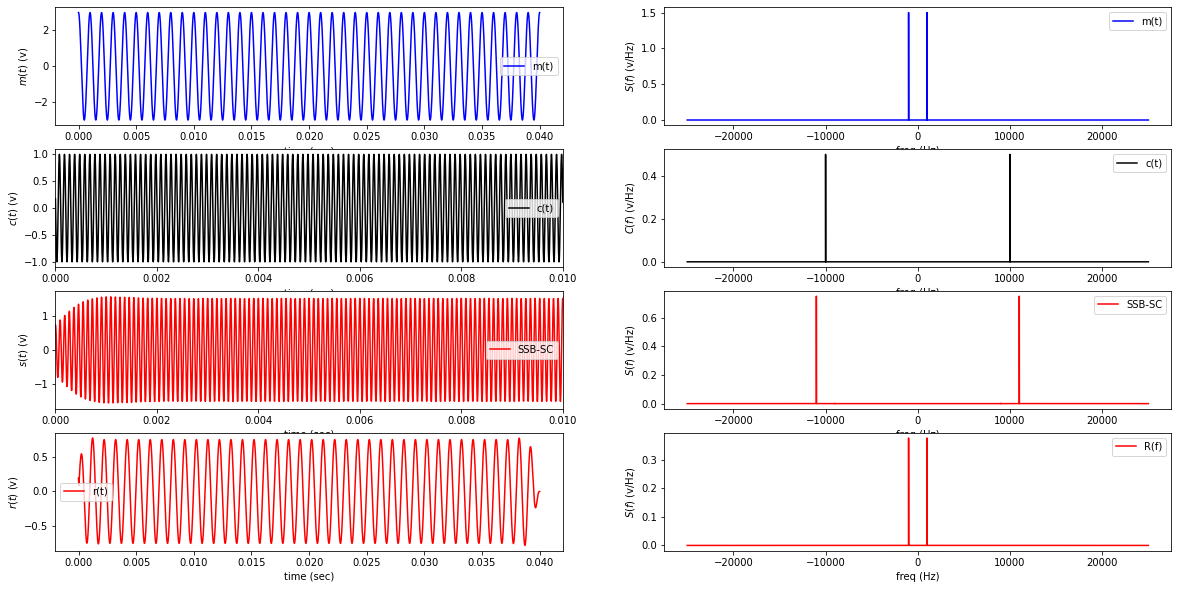

In [28]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=0 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=0 # amplitude of message signal
fm3=3000 # fequency of carrier signal


Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

Phi=80 #carrier noncoherence in phase
fd=0 #carrier noncoherence in frequency

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=40/fm
Tstep=0.001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# BPF parameters 
forder_BPF=2 # order of the filter
fs=1/Tstep
lowcut_usb = fc+(fm/2)
highcut_usb = fc+(3*fm/2)
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder_BPF)

ct=func_ct(Ac,fc+fd,t,Phi) # carrier
rt=SSB_mod_usb*ct

## LPF parameters 
forder_LPF=5
f3db=2*fm
mrt=func_filter(rt,f3db,Tstep,forder_LPF)

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.set_xlim(0,Tstop/4)
ax3.legend()

ax5.plot(t,SSB_mod_usb,'r',label='SSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.set_xlim(0,Tstop/4)
ax5.legend()

ax7.plot(t,mrt,'r',label='r(t)')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$r(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# BPF parameters 
fs=1/Tstep
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder_BPF)

rt=SSB_mod_usb*ct

## LPF parameters 
f3db=2*fm
mrt=func_filter(rt,f3db,Tstep,forder_LPF)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

SSBf_USB = np.abs(np.fft.fft(SSB_mod_usb))
freqs = np.fft.fftfreq(SSB_mod_usb.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SSBf_USB=SSBf_USB[idx]/N
ax6.plot(freqs, SSBf_USB,'r',label='SSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

MRT = np.abs(np.fft.fft(mrt))
freqs = np.fft.fftfreq(mrt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MRT=MRT[idx]/N
ax8.plot(freqs, MRT,'r',label='R(f)')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$S(f)$ (v/Hz)')
ax8.legend()

# SSB modulation/demodulation: effect of carrier noncoherence in frequency  on demodulated signal

Let us simulate DSB-SC demdoulation with carrier noncoherence in frequency, le us assume frequency deviation (df) of 500 Hz.

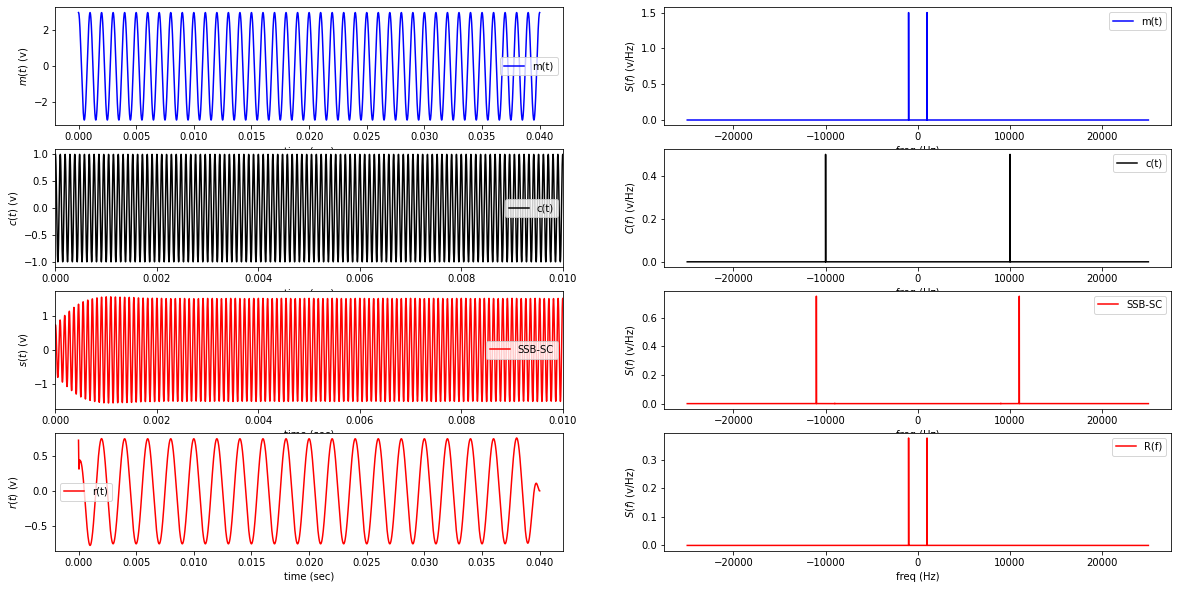

In [29]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=0 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=0 # amplitude of message signal
fm3=3000 # fequency of carrier signal


Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

Phi=0 #carrier noncoherence in phase
fd=500 #carrier noncoherence in frequency

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=40/fm
Tstep=0.001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# BPF parameters 
forder_BPF=2 # order of the filter
fs=1/Tstep
lowcut_usb = fc+(fm/2)
highcut_usb = fc+(3*fm/2)
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder_BPF)

ct=func_ct(Ac,fc+fd,t,Phi) # carrier
rt=SSB_mod_usb*ct

## LPF parameters 
forder_LPF=5
f3db=2*fm
mrt=func_filter(rt,f3db,Tstep,forder_LPF)

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.set_xlim(0,Tstop/4)
ax3.legend()

ax5.plot(t,SSB_mod_usb,'r',label='SSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.set_xlim(0,Tstop/4)
ax5.legend()

ax7.plot(t,mrt,'r',label='r(t)')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$r(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# BPF parameters 
fs=1/Tstep
SSB_mod_usb=butter_bandpass(st,lowcut_usb,highcut_usb,fs,forder_BPF)

rt=SSB_mod_usb*ct

## LPF parameters 
f3db=2*fm
mrt=func_filter(rt,f3db,Tstep,forder_LPF)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

SSBf_USB = np.abs(np.fft.fft(SSB_mod_usb))
freqs = np.fft.fftfreq(SSB_mod_usb.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SSBf_USB=SSBf_USB[idx]/N
ax6.plot(freqs, SSBf_USB,'r',label='SSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

MRT = np.abs(np.fft.fft(mrt))
freqs = np.fft.fftfreq(mrt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
MRT=MRT[idx]/N
ax8.plot(freqs, MRT,'r',label='R(f)')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$S(f)$ (v/Hz)')
ax8.legend()

# Single Sideband in the time and frequency domains - Hilbert Transform*

In the following section we will produce SSB-SC signals using the Hilbert transform

The SSB signal is given by: $s(t) = A_c m(t) \cos(2 \pi f_ct ) \mp A_c \hat{m}(t) \sin(2 \pi f_ct) $

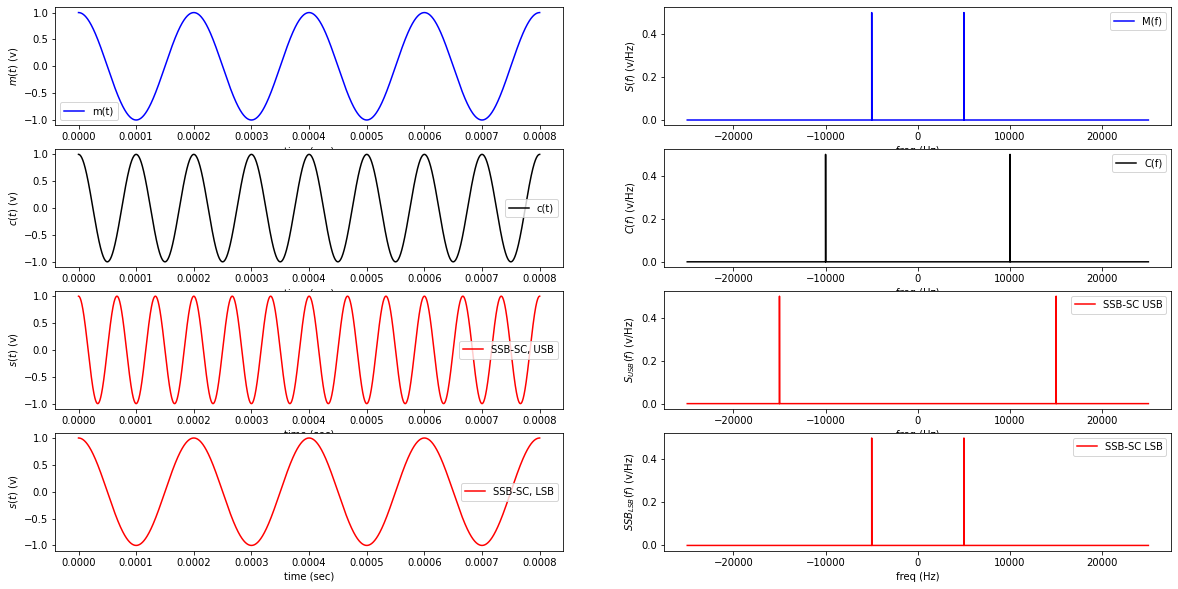

In [8]:
Am=1 # amplitude of message signal
fm=5000 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
mt_hilbert= np.imag(signal.hilbert(mt))# hilbert transform of m(t)
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
ct_shifted=Ac*np.sin(2*math.pi*fc*t) # carrier

st_usb=mt * ct - mt_hilbert * ct_shifted
st_lsb=mt * ct + mt_hilbert * ct_shifted

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st_usb,'r',label='SSB-SC, USB')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax7.plot(t,st_lsb,'r',label='SSB-SC, LSB')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$s(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
mt_hilbert= np.imag(signal.hilbert(mt))# hilbert transform of m(t)
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
ct_shifted=Ac*np.sin(2*math.pi*fc*t) # carrier

st_usb=mt * ct - mt_hilbert * ct_shifted
st_lsb=mt * ct + mt_hilbert * ct_shifted

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='M(f)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='C(f)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

SSBF_USB = np.abs(np.fft.fft(st_usb))
freqs = np.fft.fftfreq(st_usb.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SSBF_USB=SSBF_USB[idx]/N
ax6.plot(freqs, SSBF_USB,'r',label='SSB-SC USB')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S_{USB}(f)$ (v/Hz)')
ax6.legend()

SSBF_LSB = np.abs(np.fft.fft(st_lsb))
freqs = np.fft.fftfreq(st_lsb.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SSBF_LSB=SSBF_LSB[idx]/N
ax8.plot(freqs, SSBF_LSB,'r',label='SSB-SC LSB')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$SSB_{LSB}(f)$ (v/Hz)')
ax8.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\